In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
file = 'FC2018_protein_quant.xls'

In [65]:
gastric_df = pd.read_excel(file)

In [66]:
# use first row as heading 
new_header = gastric_df.iloc[0]
# remove first row from dataframe
gastric_df = gastric_df[1:]
# assign as column names
gastric_df.columns = new_header

In [67]:
print(new_header.tolist())

# manually determine which columns irrelevant, indices to remove
to_del = [0, 3, 4, 5, 6, 8, 9] + list(range(34, 109))

gastric_df = gastric_df.drop([gastric_df.columns[x] for x in to_del],  axis='columns')
gastric_df.columns

['Majority protein IDs', 'ID', 'Gene', 'KEGG', 'Peptide counts (all)', 'Peptide counts (razor+unique)', 'Peptide counts (unique)', 'Protein name', 'GO (biological process)', 'GO (cellular component)', 'NC1 Corr.', 'NC2 Corr.', 'NC3 Corr.', 'NC4 Corr.', 'GC1 Corr.', 'GC2 Corr.', 'GC3 Corr.', 'GC4 Corr.', 'PL1 Corr.', 'PL2 Corr.', 'PL3 Corr.', 'PL4 Corr.', 'NC1 Log2', 'NC2 Log2', 'NC3 Log2', 'NC4 Log2', 'GC1 Log2', 'GC2 Log2', 'GC3 Log2', 'GC4 Log2', 'PL1 Log2', 'PL2 Log2', 'PL3 Log2', 'PL4 Log2', 'log2average', 'mean', 'NC-Aver', 'SD', 'CV%', 'N', 'Mean', 'GC-Aver', 'SD', 'CV%', 'N', 'Mean', 'PL-Aver', 'SD', 'CV%', 'N', 'Discovery?', 'P value', 'NC', 'GC', 'Difference', 'GC - NC', 'SE of difference', 't ratio', 'df', 'q value', 'Significant?', 'P value', 'NC', 'GC', 'Difference', 'SE of difference', 't ratio', 'df', 'Discovery and Significant', 'Discovery or Significant', 'Discovery?', 'P value', 'NC', 'PL', 'Difference', 'PL-NC', 'SE of difference', 't ratio', 'df', 'q value', 'Signifi

Index(['ID', 'Gene', 'Protein name', 'NC1 Corr.', 'NC2 Corr.', 'NC3 Corr.',
       'NC4 Corr.', 'GC1 Corr.', 'GC2 Corr.', 'GC3 Corr.', 'GC4 Corr.',
       'PL1 Corr.', 'PL2 Corr.', 'PL3 Corr.', 'PL4 Corr.', 'NC1 Log2',
       'NC2 Log2', 'NC3 Log2', 'NC4 Log2', 'GC1 Log2', 'GC2 Log2', 'GC3 Log2',
       'GC4 Log2', 'PL1 Log2', 'PL2 Log2', 'PL3 Log2', 'PL4 Log2', 'Pattern',
       'Ribosome', 'Spliceosome', 'Valine, leucine and isoleucine degradation',
       'Oxidative phosphorylation', 'Proteasome',
       'Protein processing in endoplasmic reticulum',
       'Glycolysis / Gluconeogenesis', 'Citrate cycle (TCA cycle)',
       'Endocytosis', 'Fatty acid degradation', 'Fatty acid metabolism',
       'RNA transport', 'Pyruvate metabolism',
       'Fructose and mannose metabolism', 'Regulation of actin cytoskeleton',
       'Phagosome', 'Complement and coagulation cascades',
       'Arginine and proline metabolism', 'DNA Replication',
       'PPAR signaling pathway', 'ECM-receptor interac

In [68]:
gastric_df

# convert yes, no AND x, NaN to 1, 0
# get rid of irrelevant columns

,ID,Gene,Protein name,NC1 Corr.,NC2 Corr.,NC3 Corr.,NC4 Corr.,GC1 Corr.,GC2 Corr.,GC3 Corr.,...,RNA degradation,Mismatch repair,Stomach specific,Mitochondrion,Cytoplasm,Extracellular exosome,Membrane,Nucleus,Endoplasmic reticulum,Golgi apparatus
1,P06493,CDK1,Cyclin-dependent kinase 1,18077.1,17649.2,14895.2,13849.3,19948,14713.7,22320.2,...,NaN,NaN,NaN,X,X,X,X,X,NaN,NaN
2,P35237,SERPINB6,Serpin B6,299003,301646,271214,275144,339482,309721,349493,...,NaN,NaN,NaN,NaN,X,X,NaN,X,NaN,NaN
3,P02655,APOC2,Apolipoprotein C-II;Proapolipoprotein C-II,42369.6,38175,30100.3,30109.2,38969.1,37193.3,50277.7,...,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN
4,Q00341,HDLBP,Vigilin,1.69802e+06,1.78181e+06,1.60023e+06,1.64401e+06,1.40275e+06,1.192e+06,1.37706e+06,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN
5,P46781,RPS9,40S ribosomal protein S9,552751,569256,585769,578614,501691,454069,487281,...,NaN,NaN,NaN,NaN,X,X,X,X,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,R4GMX3,COMMD3-BMI1,Protein COMMD3-BMI1,7651.16,9482.2,10820,9973.98,11582.9,11430.6,9458.39,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN
3911,Q5VZ89,DENND4C,DENN domain-containing protein 4C,18221.8,17253.6,20092.4,19824.9,18067.3,22781.3,18471.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3912,S4R303,SORBS1,Sorbin and SH3 domain-containing protein 1 (Fr...,23775.9,23414.1,18802.7,23957.4,10137.3,14394.5,12521.7,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN
3913,V9GYT7,PSIP1,PC4 and SFRS1-interacting protein (Fragment),12874.2,11616,7467.52,11065.8,9878.04,6821.64,8921.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN


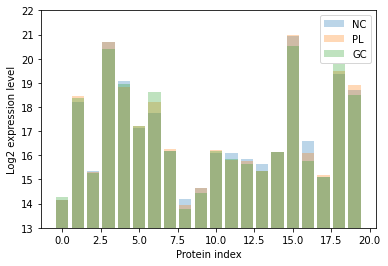

In [69]:
n = 20
xx = list(range(n))

plt.bar(xx, gastric_df['NC1 Log2'][0:n], alpha=0.3);
plt.bar(xx, gastric_df['PL1 Log2'][0:n], alpha=0.3);
plt.bar(xx, gastric_df['GC1 Log2'][0:n], alpha=0.3);
plt.legend(['NC', 'PL', 'GC'], loc='best');
plt.ylim([13,22]);
plt.xlabel('Protein index')
plt.ylabel('Log2 expression level');